<a href="https://colab.research.google.com/github/Riasat38/CSE440-Natural-Language-Processing-/blob/main/440_LAB2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import nltk
import pandas as pd
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_rus to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |  

True

In [ ]:
!pip install gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 73.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 94.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 15.1 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.15.2
    Uninstalling scipy-1.15.2:
      Successfully uninstalled scipy-1.15.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
imdb = pd.read_csv('/content/drive/MyDrive/IMDB_Dataset.csv')
print(imdb.head())

                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


In [ ]:
imdb['review'] = imdb['review'].str.lower()
print(imdb.head())

                                              review sentiment
0  one of the other reviewers has mentioned that ...  positive
1  a wonderful little production. <br /><br />the...  positive
2  i thought this was a wonderful way to spend ti...  positive
3  basically there's a family where a little boy ...  negative
4  petter mattei's "love in the time of money" is...  positive


In [ ]:
import string
imdb['review'] = imdb['review'].apply(
    lambda text: text.translate(str.maketrans('', '', string.punctuation))
)
print(imdb.head())

                                              review sentiment
0  one of the other reviewers has mentioned that ...  positive
1  a wonderful little production br br the filmin...  positive
2  i thought this was a wonderful way to spend ti...  positive
3  basically theres a family where a little boy j...  negative
4  petter matteis love in the time of money is a ...  positive


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

tf_idf = TfidfVectorizer()
X = tf_idf.fit_transform(imdb['review'])
y = imdb['sentiment'].map({'positive': 1, 'negative': 0})

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.8, test_size = 0.2, stratify = y)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

f1 score for KNN classifier:  0.7738502470543519


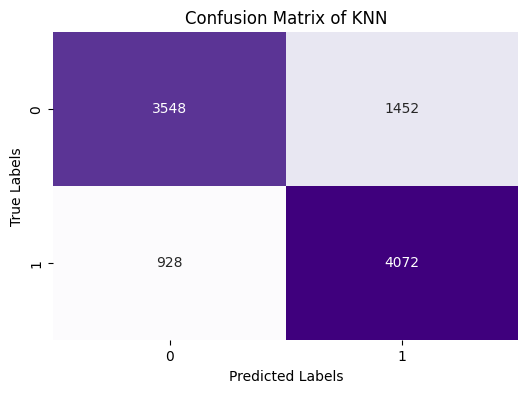

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

f1s = f1_score(y_test, y_pred)
print("f1 score for KNN classifier: ",f1s)
knnc = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(knnc, annot=True, fmt='d', cmap='Purples', cbar=False)
plt.title('Confusion Matrix of KNN')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
import numpy as np

def load_glove(path, dim=200):
    glove = {}
    with open(path, 'r', encoding='utf8') as f:
        for line in f:
            parts = line.strip().split()
            if len(parts) != dim + 1:
                continue
            word = parts[0]
            vec = np.array(parts[1:], dtype='float32')
            glove[word] = vec
    return glove


In [ ]:
def most_similar(vec, glove):
    sims = {}
    for word, w_vec in glove.items():
        sim = np.dot(vec, w_vec) / (np.linalg.norm(vec) * np.linalg.norm(w_vec))
        sims[word] = sim

    return sorted(sims.items(), key=lambda x: x[1], reverse=True)

In [ ]:
glove = load_glove("/content/drive/MyDrive/glove.6B.200d.txt")

v = glove['queen'] - glove['female'] + glove['male']
result = most_similar(v, glove)

for word, score in result:
   if word not in ['queen', 'female', 'male']:
        print("Result:", word)
        break

Result: king


In [ ]:
from nltk.corpus import gutenberg,reuters, stopwords
from nltk.tokenize import word_tokenize



In [ ]:
docs = gutenberg.fileids()
#docs = reuters.fileids()
corpus = []
stop_words = set(stopwords.words('english'))
for id in docs:
    #text = reuters.raw(id)
    text = gutenberg.raw(id)
    tokenized = word_tokenize(text)
    processed = [word for word in tokenized if word.lower() not in stop_words]
    corpus.append(processed)


In [ ]:
from gensim.models import Word2Vec

model = Word2Vec(corpus, vector_size=100, window=5, min_count=3, alpha=0.001, min_alpha=0.00005, sg =1, workers=3, epochs=100)
#model.train(corpus, total_examples= len(corpus), epochs=10, start_alpha=0.01, end_alpha=0.00005)


ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

In [ ]:
word1 = str(input("Enter first word: "))
word2 = str(input("Enter second word: "))
try:
    similarity_score = model.wv.similarity(word1, word2)
    print("Similarity between", word1, "and", word2, "is:", similarity_score)
except:
    print("Word not in vocabulary")

In [ ]:
def word_calc(w1, w2, w3):
    for word in [w1, w2, w3]:
        if word not in model.wv.key_to_index:
            return "Word  not in vocabulary."

    result = model.wv.most_similar(positive=[w1, w3], negative=[w2], topn=10)
    return result[0][0] if result else None

In [ ]:
print("king - man + woman =", word_calc( "king", "man", "woman"))
print("paris - france + italy =", word_calc("paris", "france", "italy"))
print("tree - leaves + flowers =", word_calc("tree", "leaves", "flowers"))
print("car - engine + cow =", word_calc("car", "engine", "cow"))
print("bed - pillow + sand =", word_calc("bed", "pillow", "sand"))

In [ ]:
from collections import Counter
from nltk.probability import FreqDist
from sklearn.decomposition import PCA

all_tokens = [word for doc in corpus for word in doc]
freq_dist = Counter(all_tokens)
most_common_100 = [word for word, _ in freq_dist.most_common(100) if word in model.wv]

word_vectors = np.array([model.wv[word] for word in most_common_100])
pca = PCA(n_components=2)
word_vectors_2d = pca.fit_transform(word_vectors)

plt.figure(figsize=(16, 12))
for i, word in enumerate(most_common_100):
    plt.scatter(word_vectors_2d[i, 0], word_vectors_2d[i, 1])
    plt.annotate(word, (word_vectors_2d[i, 0], word_vectors_2d[i, 1]), fontsize=9)
plt.title("PCA Projection of Word Embeddings (Top 100 Frequent Words)")
plt.grid(True)
plt.show()